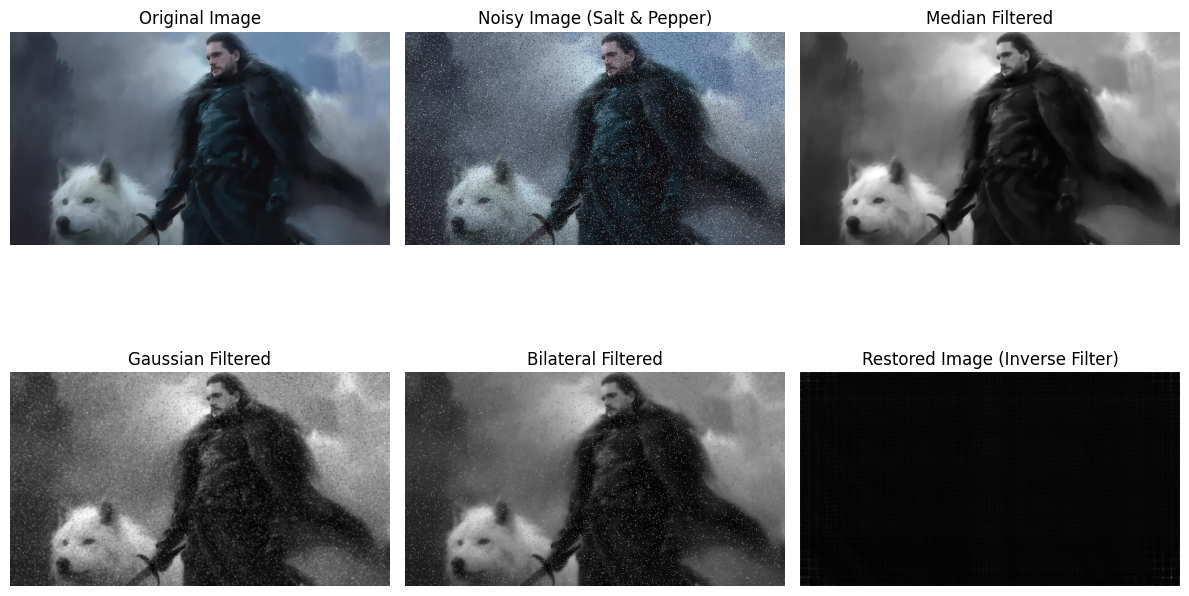

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Add noise to an image
def add_noise(img, noise_type="gaussian"):
    row, col, ch = img.shape
    if noise_type == "salt_and_pepper":
        num_salt = np.ceil(0.02 * img.size * 0.5)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
        img[coords[0], coords[1], :] = 1
        num_pepper = np.ceil(0.02 * img.size * 0.5)
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
        img[coords[0], coords[1], :] = 0
        return img
    return np.clip(img + np.random.normal(0, 0.01 ** 0.5, (row, col, ch)), 0, 1)

# Inverse filtering (simplified for Gaussian blur)
def inverse_filter(blurred_img, psf):
    restored_fft = np.fft.fft2(blurred_img) / (np.fft.fft2(psf, s=blurred_img.shape) + 1e-5)
    return np.abs(np.fft.ifft2(restored_fft))

# Noise removal filters
def noise_removal(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return (cv2.medianBlur(img_gray, 5), cv2.GaussianBlur(img_gray, (5, 5), 0), cv2.bilateralFilter(img_gray, 9, 75, 75))

# Main
img = cv2.imread('p4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
noisy_img = add_noise(np.copy(img), noise_type="salt_and_pepper")
median_filt, gauss_filt, bilat_filt = noise_removal((noisy_img * 255).astype(np.uint8))

psf = cv2.getGaussianKernel(21, 5) @ cv2.getGaussianKernel(21, 5).T
blurred_img = cv2.filter2D(img, -1, psf)
restored_img = inverse_filter(blurred_img[:, :, 0], psf)

# Plotting results
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
titles = ["Original", "Noisy", "Median", "Gaussian", "Bilateral", "Restored"]
images = [img, noisy_img, median_filt, gauss_filt, bilat_filt, restored_img]
for ax, img, title in zip(axs.ravel(), images, titles):2.3
    ax.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    ax.set_title(title)
    ax.axis('off')
plt.tight_layout()
plt.show()


